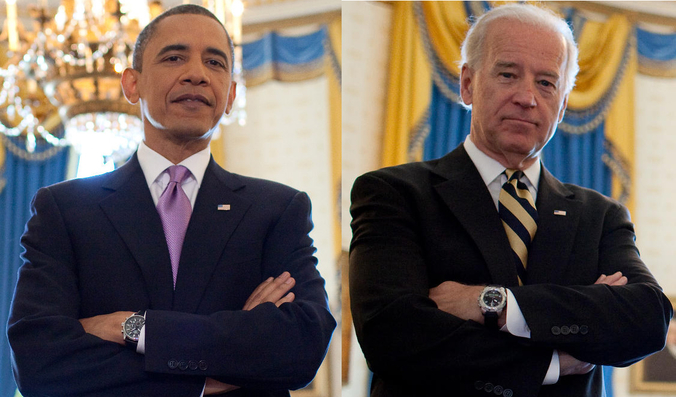

In [7]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('two_people.jpg')
display(pil_im)

In [4]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
print('obama_face_encoding:', obama_face_encoding)
# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
print('biden_face_encoding:', biden_face_encoding)
# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

obama_face_encoding: [-0.0914344   0.13086095  0.01314385 -0.05788445  0.01628965  0.00041327
 -0.08469851 -0.09900524  0.17989591 -0.10539678  0.24560224  0.08059315
 -0.2161147  -0.13486721  0.04742461  0.12056788 -0.16367513 -0.07826022
 -0.1122469  -0.10610124  0.03652948  0.00634994  0.10533702  0.04300565
 -0.12117673 -0.33629149 -0.06974643 -0.18218073 -0.00158545 -0.1120832
 -0.09656743 -0.02059199 -0.18194009 -0.1091411   0.02073221 -0.02022129
  0.00240957 -0.00374015  0.20474017  0.0282058  -0.11632427  0.09632833
  0.01547976  0.21318354  0.28629938  0.07692298 -0.01180618 -0.09913055
  0.10386178 -0.21633516  0.07274053  0.14290063  0.08237933  0.04238797
  0.09769628 -0.18852283  0.00360183  0.08834425 -0.14143489  0.00837216
  0.0078872  -0.08102693 -0.04035496  0.0387958   0.20594732  0.09965956
 -0.1229291  -0.05094442  0.13211268 -0.02900139  0.02445153  0.02434404
 -0.18431334 -0.20063369 -0.22774039  0.09293823  0.37345198  0.19359806
 -0.2088118   0.01955765 -0.195

In [8]:
font_size = 16
font = ImageFont.truetype("arial.ttf", font_size)
draw = ImageDraw.Draw(pil_im)

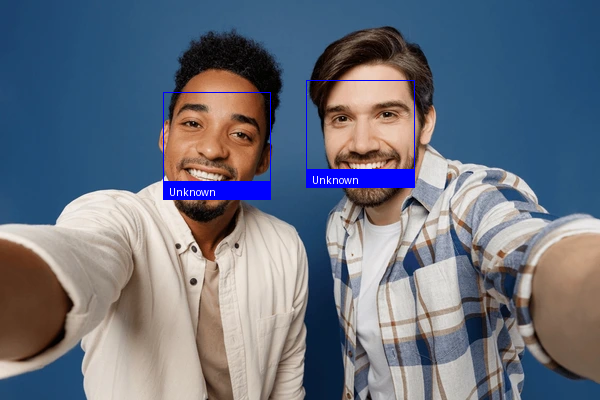

In [15]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("2.webp")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    bbox = draw.textbbox((left, bottom), name)  # Lấy bounding box của văn bản
    text_width = bbox[2] - bbox[0]  # Chiều rộng văn bản
    text_height = bbox[3] - bbox[1]  # Chiều cao văn bản

    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)